In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
digitos = pd.read_csv('train.csv', sep=',')

In [5]:
y = digitos.iloc[:,:1]

x = digitos.iloc[:,1:]

In [6]:
print(x.shape, y.shape)

(42000, 784) (42000, 1)


In [7]:
X_treino, testeData, Y_treino, testeLabels = train_test_split(x, y, test_size=0.3)

In [8]:
treinoData, ValidData, treinoLabels, validLabels = train_test_split(X_treino, Y_treino, test_size=0.1)

In [9]:
print(f'Treino: {len(treinoLabels)}')
print(f'Validação: {len(validLabels)}')
print(f'Teste: {len(testeLabels)}')

Treino: 26460
Validação: 2940
Teste: 12600


In [10]:
x_norm = np.mean(x, axis=0)

x_treino_norm = treinoData - x_norm
x_valid_norm = ValidData - x_norm
x_teste_norm = testeData - x_norm

In [11]:
print(x_treino_norm.shape, x_valid_norm.shape, x_teste_norm.shape)

(26460, 784) (2940, 784) (12600, 784)


In [12]:
kVals = range(1, 30, 2)

In [13]:
acuracias = []

In [14]:
for k in kVals:
    modeloKNN = KNeighborsClassifier(n_neighbors=k)
    modeloKNN.fit(treinoData, treinoLabels)
    score = modeloKNN.score(ValidData.values, validLabels)
    print(f'Com valor de k = {k}, acurácia de {round(score * 100, 2)}%')
    acuracias.append(score)

Com valor de k = 1, acurácia de 96.26%
Com valor de k = 3, acurácia de 96.05%
Com valor de k = 5, acurácia de 96.05%
Com valor de k = 7, acurácia de 95.85%
Com valor de k = 9, acurácia de 95.48%
Com valor de k = 11, acurácia de 95.27%
Com valor de k = 13, acurácia de 94.9%
Com valor de k = 15, acurácia de 94.9%
Com valor de k = 17, acurácia de 94.69%
Com valor de k = 19, acurácia de 94.56%
Com valor de k = 21, acurácia de 94.63%
Com valor de k = 23, acurácia de 94.63%
Com valor de k = 25, acurácia de 94.42%
Com valor de k = 27, acurácia de 94.46%
Com valor de k = 29, acurácia de 94.18%


In [15]:
i = np.argmax(acuracias)
print(f'O valor de K = {kVals[i]} alcançou acurácia de {round(acuracias[i] * 100, 2)}% nos dados de validação')

O valor de K = 1 alcançou acurácia de 96.26% nos dados de validação


In [16]:
modeloFinal = KNeighborsClassifier(n_neighbors=kVals[i])

In [17]:
modeloFinal.fit(treinoData, treinoLabels)

KNeighborsClassifier(n_neighbors=1)

In [18]:
predictions = modeloFinal.predict(testeData.values)

In [19]:
print('Avaliação Modelo Dados teste')
print(classification_report(testeLabels, predictions))

Avaliação Modelo Dados teste
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1223
           1       0.97      0.99      0.98      1387
           2       0.98      0.96      0.97      1273
           3       0.95      0.96      0.96      1315
           4       0.97      0.96      0.96      1210
           5       0.95      0.95      0.95      1202
           6       0.98      0.98      0.98      1245
           7       0.96      0.97      0.97      1308
           8       0.98      0.92      0.95      1212
           9       0.93      0.95      0.94      1225

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



In [20]:
print('Confusion Matrix')
print(confusion_matrix(testeLabels, predictions))

Confusion Matrix
[[1217    0    1    1    0    2    1    0    0    1]
 [   0 1376    5    0    1    0    1    3    1    0]
 [   9    5 1228    4    2    1    1   14    5    4]
 [   2    2   12 1262    0   16    0    8    5    8]
 [   2    9    0    0 1157    1    3    7    0   31]
 [   3    1    2   24    0 1142   16    1    4    9]
 [   8    3    2    0    4    7 1220    0    1    0]
 [   1   11    1    2    2    0    0 1271    0   20]
 [   3   12    7   22    2   26    3    2 1117   18]
 [   5    1    1    9   24    2    1   20    2 1160]]


Este dígito pode ser: 6


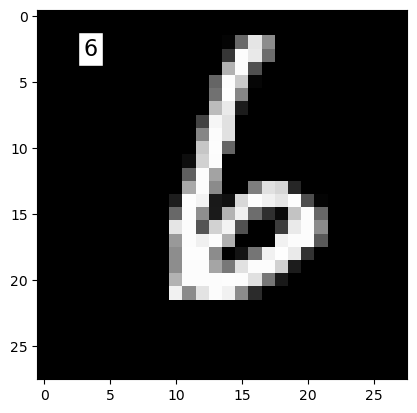

Este dígito pode ser: 3


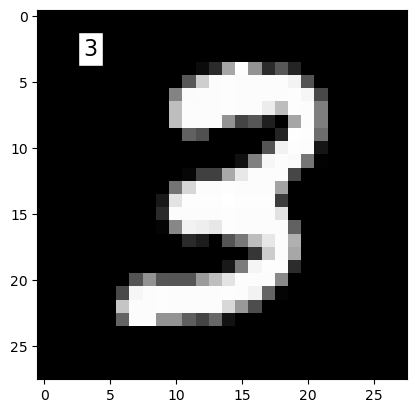

Este dígito pode ser: 7


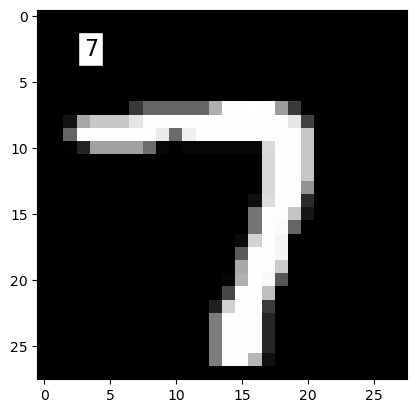

Este dígito pode ser: 0


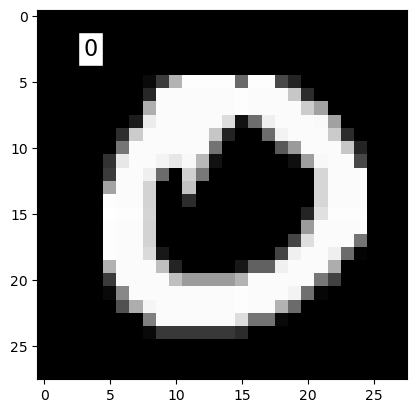

Este dígito pode ser: 6


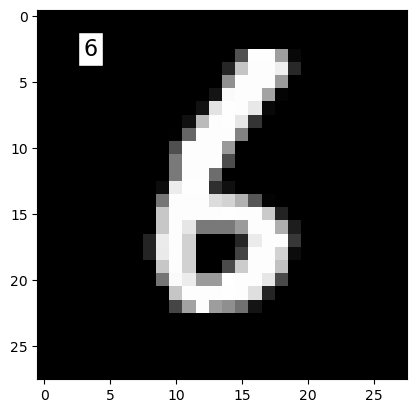

In [21]:
for i in np.random.randint(0, high=len(testeLabels), size=(5,)):
    
    image = testeData.iloc[[i]]
    predictions = modeloFinal.predict(image.values)[0]
    
    imgdata = np.array(image, dtype='float')
    pixels = imgdata.reshape ((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.annotate(predictions, (3,3), bbox={'facecolor':'white'}, fontsize=16)
    print(f'Este dígito pode ser: {predictions}')
    plt.show()

Dataset Test


In [22]:
digitos_test = pd.read_csv('test.csv', sep=',')

print(digitos_test.shape)

(28000, 784)


In [23]:
testLabel = pd.read_csv('sample_submission.csv', sep=',')

print(testLabel.shape)

(28000, 2)


In [24]:
y_label_teste = testLabel.iloc[:,:1]

print(y_label_teste.shape)

(28000, 1)


Este dígito pode ser: 2


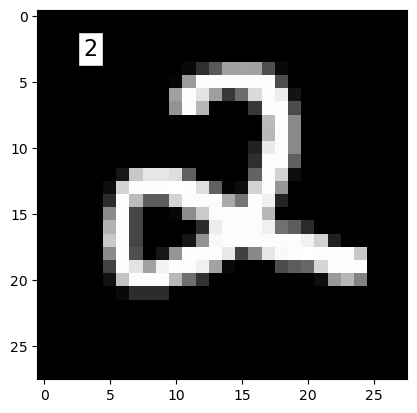

Este dígito pode ser: 6


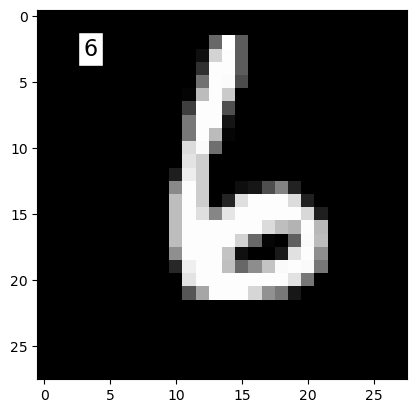

Este dígito pode ser: 7


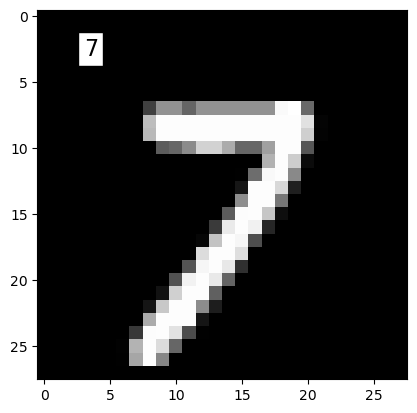

Este dígito pode ser: 8


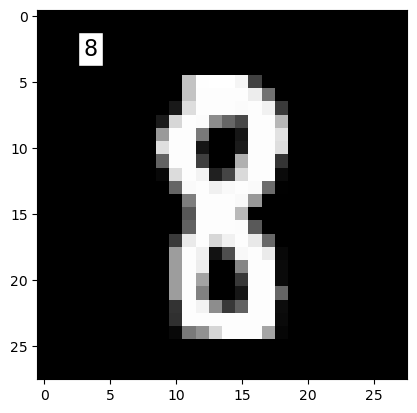

Este dígito pode ser: 8


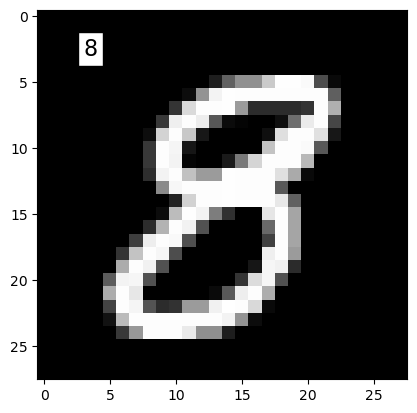

In [31]:
for i in np.random.randint(0, high=len(y_label_teste), size=(5,)):
    
    image = digitos_test.iloc[[i]]
    predictions = modeloFinal.predict(image.values)[0]
    
    imgdata = np.array(image, dtype='float')
    pixels = imgdata.reshape ((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.annotate(predictions, (3,3), bbox={'facecolor':'white'}, fontsize=16)
    print(f'Este dígito pode ser: {predictions}')
   
    plt.show()

In [33]:
for i in range(len(y_label_teste)):
    number = digitos_test.iloc[[i]]
    predictions = modeloFinal.predict(number.values)[0]
    testLabel.iloc[i, 1] = predictions

testLabel.to_csv('sample_submission.csv', index=False)